In [11]:
import os
import nltk
import re

from collections import Counter

from tqdm import tqdm

root_dir = "/Users/minjoons/data/cnn/questions"
data_dir = os.path.join(root_dir, "test")

char_counter = Counter()
word_counter = Counter()
ent_counter = Counter()
max_num_words = 0
max_num_ques_words = 0
max_num_sents = 0
max_num_words_per_sent = 0
max_num_chars = 0

nums_words = []
nums_ques_words = []
nums_sents = []
nums_words_per_sent = []
nums_chars = []
nums_entities = []

sent_tokenize = lambda x: re.split("[.!?]", x)
sent_tokenize = nltk.sent_tokenize

num_ques = len(list(os.listdir(data_dir)))

for path in tqdm(os.listdir(data_dir), total=num_ques):
    if path.endswith(".question"):
        with open(os.path.join(data_dir, path), 'r') as fh:
            url = fh.readline().strip()
            _ = fh.readline()
            para = fh.readline().strip()
            _ = fh.readline()
            ques = fh.readline().strip()
            _ = fh.readline()
            answer = fh.readline().strip()
            _ = fh.readline()
            cands = list(line.strip() for line in fh)
            cand_ents = list(cand.split(":")[0] for cand in cands)
            words = para.split(" ")
            sents = sent_tokenize(para)
            wordss = list(sent.split(" ") for sent in sents)
            ques_words = ques.split(" ")
            
            nums_entities.append(len(cands))
            nums_words.append(len(words))
            nums_ques_words.append(len(ques_words))
            nums_sents.append(len(sents))
            nums_words_per_sent.extend(map(len, wordss))
            nums_chars.extend(map(len, words))
            
            for word in ques_words:
                if word.startswith("@"):
                    ent_counter[word] += 1
                else:
                    word_counter[word] += 1
                    for c in word:
                        char_counter[c] += 1
            
            for word in words:
                if word.startswith("@"):
                    ent_counter[word] += 1
                else:
                    word_counter[word] += 1
                    for c in word:
                        char_counter[c] += 1

100%|██████████| 3198/3198 [00:09<00:00, 333.17it/s]


In [6]:
len(word_counter), len(ent_counter), len(char_counter)

(22747, 465, 77)

In [7]:
max_num_words, max_num_ques_words, max_num_sents, max_num_words_per_sent, max_num_chars

(1989, 37, 122, 443, 24)

In [4]:
import re
re.split("[.!?]", "hello. Wow! Hmm?")


['hello', ' Wow', ' Hmm', '']

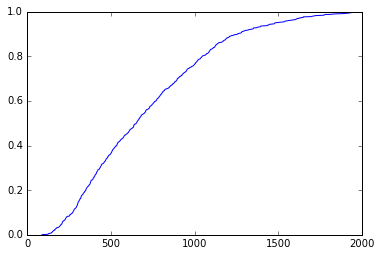

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
counter = Counter(nums_words)
values = list(counter.values())
plt.plot(list(counter.keys()), np.cumsum(values)/sum(values))
plt.show()
# plt.hist(nums_words)
# plt.show()

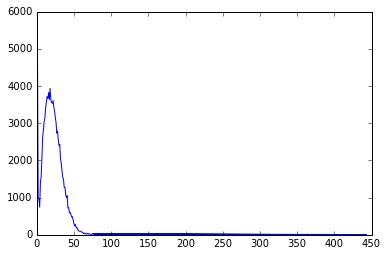

In [8]:

counter = Counter(nums_words_per_sent)
plt.plot(list(counter.keys()), list(counter.values()))
plt.show()

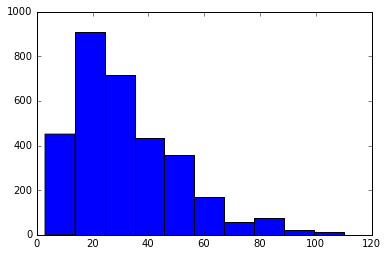

In [10]:
plt.hist(nums_sents)
plt.show()

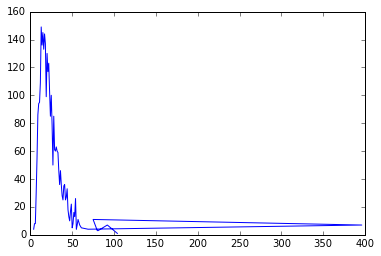

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
counter = Counter(nums_entities)
plt.plot(list(counter.keys()), list(counter.values()))
plt.show()
